In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Mount Drive**

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Read Dataset: .csv/.xlsx to DataFrame**

In [250]:
import os
directory = "/content/drive/MyDrive/CSE422_Lab/project/dataset/"
os.chdir(directory)

In [251]:
!ls

data.csv


In [252]:
import pandas as pd

file_name = "data.csv"
dataset = pd.read_csv(file_name)          # Loading the dataset as a csv file dataframe.

In [253]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **Dataset Analysis**

- shape
- columns
- head()
- sample()
- describe()
- finding categorical features
- checking if any null/nan values
- filtering data instances based on indices
- filtering data instances based on conditional statements


In [254]:
# showing the dimension of the dataset
dataset.shape

(569, 33)

In [255]:
# showing all the columns of the dataset
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [256]:
# Showing the first 5 values.
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [257]:
# showing first random sample of the data
dataset.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
224,8813129,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,...,23.60,98.84,708.8,0.1276,0.13110,0.17860,0.09678,0.2506,0.07623,NaN
153,87106,B,11.15,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,...,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772,NaN
207,879830,M,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,...,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469,NaN
485,913063,B,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,...,21.03,97.82,580.6,0.1175,0.40610,0.48960,0.13420,0.3231,0.10340,NaN
501,91504,M,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,...,32.94,106.00,788.0,0.1794,0.39660,0.33810,0.15210,0.3651,0.11830,NaN


In [258]:
# showing statisticat feature of the dataset.
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [259]:
# categorical features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [260]:
# showing all the unique columns under the particular column tumor size.
dataset["diagnosis"].unique()

array(['M', 'B'], dtype=object)

# **Dataset Visualization**

- Dataset biased or not
- Histogram
- Scatter Plot
- Bar chart
- etc.

In [261]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

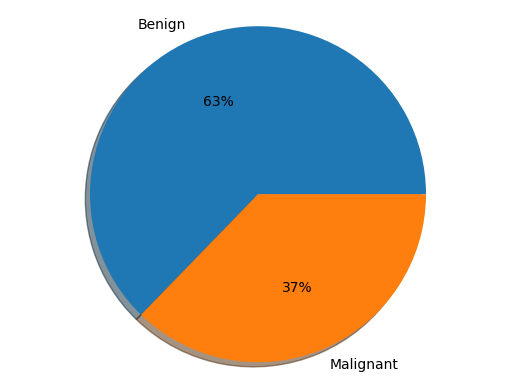

In [262]:
x, y= dataset['diagnosis'].value_counts()

classs = [x, y]
class_labels = ["Benign", "Malignant"]
plt.pie(classs, labels = class_labels, autopct = '%0.0f%%', shadow = True)
plt.axis("equal")
plt.show()

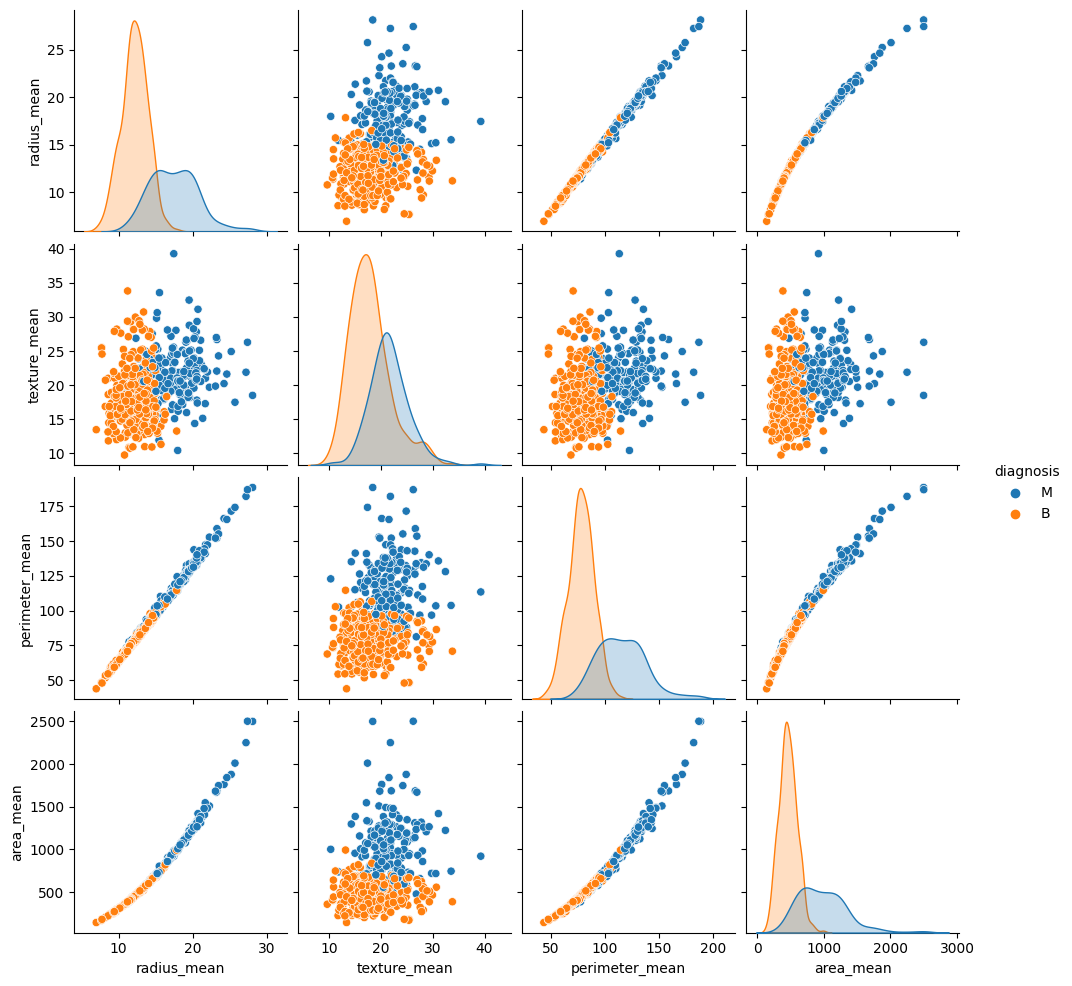

In [263]:
sns.pairplot(dataset.iloc[:,1:6], hue = 'diagnosis')

In [264]:
# Correlation of the columns
dataset.iloc[:, :].corr()

<ipython-input-264-7019cbfee031>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.iloc[:, :].corr()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


<ipython-input-265-b3187c43f741>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.iloc[:, :].corr())


<Axes: >

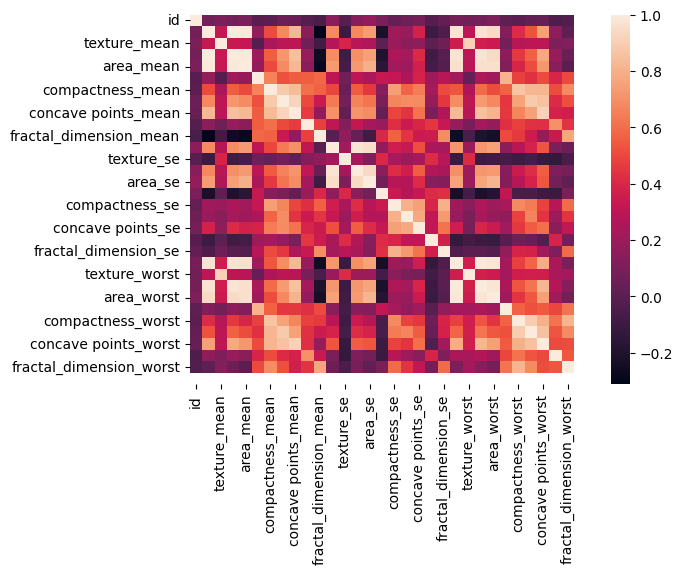

In [265]:
sns.heatmap(dataset.iloc[:, :].corr())

<ipython-input-266-e9eee47db30f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.iloc[:, :5].corr(), annot = True, fmt = '.0%')


<Axes: >

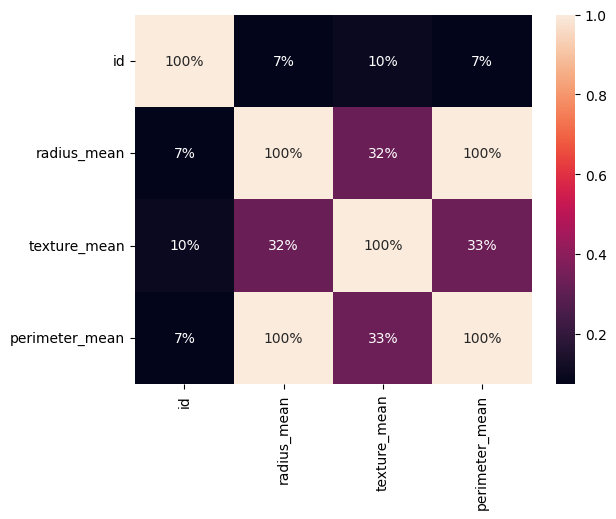

In [266]:
#plt.figure(figsize = (10, 10))
sns.heatmap(dataset.iloc[:, :5].corr(), annot = True, fmt = '.0%')

# **Dataset Pre-processing**

- Null/NaN values handling

    a) Delete Rows

    b) Delete Columns

    c) Impute Values

- Encoding Categorical Features

- Feature Scaling

Null/NaN values handling






In [267]:
dataset.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [268]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [269]:
# checking if any null/nan values
dataset.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [270]:
dataset = dataset.drop(["Unnamed: 32"], axis=1)

In [271]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [272]:
dataset.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

Encoding Categorical Features


In [273]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

#applying encoding to the diagnosis column.
dataset['diagnosis_enc'] = enc.fit_transform(dataset['diagnosis'])

In [274]:
x = dataset['diagnosis'].head()
print(x)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


In [275]:
y = dataset['diagnosis_enc'].head()
print(y)

0    1
1    1
2    1
3    1
4    1
Name: diagnosis_enc, dtype: int64


In [276]:
# now comparing both the columns
z = dataset[['diagnosis', 'diagnosis_enc']].sample(10)
print(z)

    diagnosis  diagnosis_enc
422         B              0
535         M              1
18          M              1
165         B              0
156         M              1
239         M              1
146         M              1
405         B              0
264         M              1
233         M              1


In [277]:
dataset[['diagnosis', 'diagnosis_enc']]

,diagnosis,diagnosis_enc
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


In [278]:
dataset = dataset.drop(["diagnosis"], axis=1)

In [279]:
dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_enc
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Feature Scaling

In [280]:
dataset.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_enc'],
      dtype='object')

In [281]:
from sklearn.preprocessing import MinMaxScaler

list_of_features = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

scaler = MinMaxScaler()

dataset[list_of_features] = scaler.fit_transform(dataset[list_of_features])

In [282]:
dataset.sample(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_enc
469,0.000991,0.219556,0.286439,0.225209,0.112534,0.585628,0.395436,0.238988,0.276541,0.453030,...,0.356610,0.187908,0.084275,0.705474,0.252748,0.254473,0.486598,0.215849,0.247016,0
60,0.000933,0.150930,0.174839,0.143459,0.071432,0.548614,0.187811,0.025398,0.064115,0.850000,...,0.144723,0.096867,0.045075,0.371987,0.069244,0.017316,0.088625,0.392667,0.165027,0
34,0.000928,0.433007,0.276294,0.436805,0.281527,0.463754,0.418747,0.317245,0.385288,0.473737,...,0.406183,0.409831,0.264402,0.484911,0.536630,0.421246,0.640550,0.533215,0.447724,1
196,0.000952,0.321312,0.425431,0.323682,0.188929,0.608197,0.329182,0.324508,0.324354,0.390909,...,0.586087,0.304746,0.152797,0.677079,0.276421,0.304233,0.574914,0.298640,0.251148,1
395,0.000982,0.335037,0.252621,0.317601,0.197497,0.251151,0.104994,0.062816,0.161581,0.293434,...,0.355011,0.229145,0.122714,0.233969,0.092955,0.067572,0.271856,0.188843,0.072478,0
38,0.000929,0.379052,0.523842,0.357612,0.235546,0.372303,0.097939,0.056186,0.144085,0.255051,...,0.351279,0.224762,0.126229,0.149904,0.023304,0.019153,0.099622,0.000000,0.000000,1
366,0.009879,0.625633,0.578965,0.621312,0.462566,0.419067,0.452488,0.384489,0.628728,0.411616,...,0.580757,0.545794,0.365169,0.373968,0.304945,0.295767,0.739519,0.336290,0.139578,1
189,0.000950,0.251739,0.209334,0.242139,0.135822,0.254311,0.163027,0.090066,0.082207,0.306566,...,0.201759,0.180487,0.088847,0.253781,0.133607,0.113658,0.165464,0.180761,0.052604,0
523,0.000998,0.318472,0.303348,0.310552,0.181336,0.420060,0.268757,0.126172,0.188022,0.330303,...,0.362740,0.244136,0.126991,0.471043,0.222478,0.154553,0.441237,0.253105,0.231339,0
530,0.000091,0.225709,0.265472,0.221823,0.118515,0.493545,0.238482,0.123758,0.220676,0.271717,...,0.425373,0.189800,0.090223,0.420855,0.153399,0.109105,0.347079,0.179972,0.147776,0


# **Feature Selection**

In [283]:
x_data = dataset[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y_data = dataset[['diagnosis_enc']]

In [284]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [285]:
y_data

,diagnosis_enc
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


# **Dataset Splitting**

- Training Set

- Testing Set

In [286]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1, stratify = y_data)

In [287]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [288]:
y_train.shape, y_test.shape

((455, 1), (114, 1))

# **Dataset Training**

Classification Problem

- SVM

- Decision Tree

- K-nearest Neighbors

- Logistic Regression

Regression Problem
- https://www.upgrad.com/blog/types-of-regression-models-in-machine-learning/

Naive Bayes Classifier

In [289]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [290]:
#training accuracy
training = gnb.score(x_train, y_train)
print(training)

0.9362637362637363


Logistic Regression Classifier

In [291]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [292]:
#training accuracy
training = log.score(x_train, y_train)
print(training)

0.9736263736263736


Decision Tree Classifier

In [293]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [294]:
#training accuracy
training = tree.score(x_train, y_train)
print(training)

1.0


# **Dataset Testing with the unseen x_data**

In [318]:
y_test

,diagnosis_enc
196,1
120,0
151,0
280,1
288,0
...,...
429,0
467,0
540,0
471,0


Naive Bayes Classification

In [295]:
# Testing accuracy
testing = gnb.score(x_test, y_test)
print(testing)

0.956140350877193


In [297]:
predictions = gnb.predict(x_test)
print(predictions)

[1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]


In [299]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions, y_test)
print(cm)

[[71  4]
 [ 1 38]]


In [300]:
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TP+TN)/(TP+TN+FN+FP)
print(accuracy)

0.956140350877193


<Axes: >

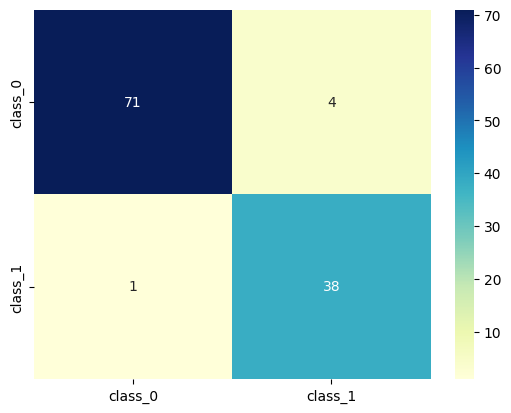

In [301]:
sns.heatmap(cm, xticklabels = ["class_0", "class_1"], yticklabels = ["class_0", "class_1"], cmap = 'YlGnBu', annot=True)

Logistic Regression


In [302]:
# Testing accuracy
testing_log = log.score(x_test, y_test)
print(testing_log)

0.956140350877193


In [303]:
predictions_log = log.predict(x_test)
print(predictions_log)

[1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]


In [304]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(predictions_log, y_test)
print(cm_log)

[[71  4]
 [ 1 38]]


In [305]:
TP = cm_log[0][0]
TN = cm_log[1][1]
FN = cm_log[1][0]
FP = cm_log[0][1]

accuracy = (TP+TN)/(TP+TN+FN+FP)
print(accuracy)

0.956140350877193


<Axes: >

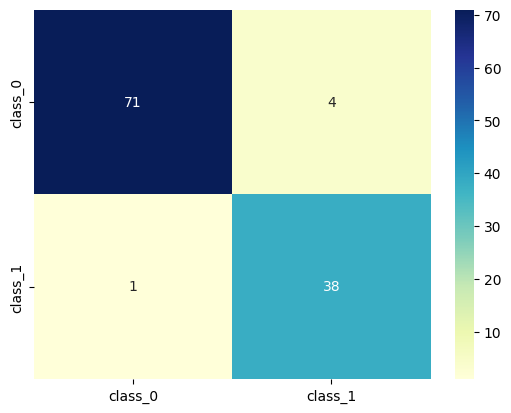

In [306]:
sns.heatmap(cm_log, xticklabels = ["class_0", "class_1"], yticklabels = ["class_0", "class_1"], cmap = 'YlGnBu', annot=True)

Decision Tree

In [307]:
# Testing accuracy
testing_tree = tree.score(x_test, y_test)
print(testing_tree)

0.9298245614035088


In [308]:
predictions_tree = tree.predict(x_test)
print(predictions_tree)

[1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]


In [309]:
from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(predictions_tree, y_test)
print(cm_tree)

[[68  4]
 [ 4 38]]


In [310]:
TP = cm_tree[0][0]
TN = cm_tree[1][1]
FN = cm_tree[1][0]
FP = cm_tree[0][1]

accuracy_tree = (TP+TN)/(TP+TN+FN+FP)
print(accuracy_tree)

0.9298245614035088


<Axes: >

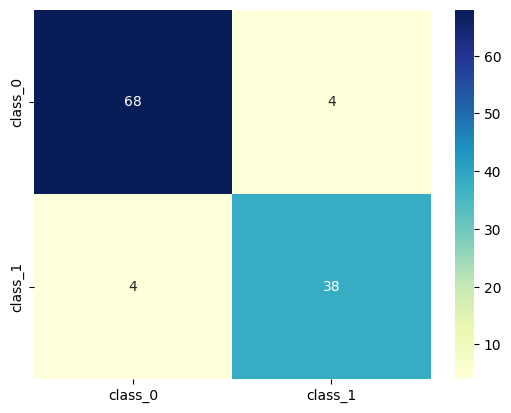

In [311]:
sns.heatmap(cm_tree, xticklabels = ["class_0", "class_1"], yticklabels = ["class_0", "class_1"], cmap = 'YlGnBu', annot=True)

# **Result analysis of used models**

In [312]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Naive Bayes

In [313]:
nb_result = classification_report(y_test, predictions)
print(nb_result)
nb_accuracy = accuracy_score(y_test, predictions)
print(nb_accuracy)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


Logistic Regression

In [314]:
log_result = classification_report(y_test, predictions_log)
print(log_result)
log_accuracy = accuracy_score(y_test, predictions_log)
print(log_accuracy)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


Decision Tree

In [315]:
tree_result = classification_report(y_test, predictions_tree)
print(tree_result)
tree_accuracy = accuracy_score(y_test, predictions_tree)
print(tree_accuracy)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

0.9298245614035088


Comparing the models

In [316]:
models = ["Naive Bayes", "Logistic Regression", "Decision Tree"]
#print(models)
accuracy = [nb_accuracy, log_accuracy, tree_accuracy]
#print(accuracy)

for i in range(len(models)):
  print(models[i], ":", accuracy[i]*100,"%")

Naive Bayes : 95.6140350877193 %
Logistic Regression : 95.6140350877193 %
Decision Tree : 92.98245614035088 %


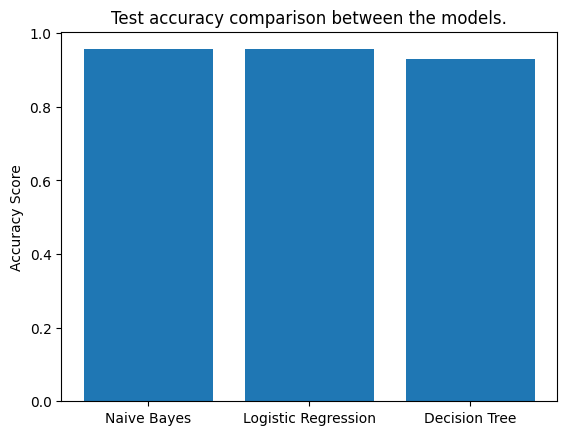

In [317]:
plt.bar(models, accuracy)
plt.ylabel("Accuracy Score")
plt.title("Test accuracy comparison between the models.")
plt.show()

# **Summary of your project**

Naive Bayes and Logistic regression has the same accuracy score which is greater than Decision Tree. So for this classification, both naive bayes and logistic regression performs better than that of Decision Tree